# 手寫阿拉伯數字辨識01

## 步驟1：載入 MNIST 手寫阿拉伯數字資料

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

# 載入 MNIST 手寫阿拉伯數字資料
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 訓練/測試資料的 X/y 維度
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

2024-09-21 15:54:14.591055: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-21 15:54:14.799411: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-21 15:54:14.887954: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-21 15:54:14.917357: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-21 15:54:15.095871: I tensorflow/core/platform/cpu_feature_guar

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [2]:
# 訓練資料前10筆圖片的數字
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [3]:
# 顯示第1張圖片內含值
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
# 將非0的數字轉為1，顯示第1張圖片
data = x_train[0].copy()
data[data > 0] = 1

# 將轉換後二維內容顯示出來，隱約可以看出數字為 5
text_image = []
for i in range(data.shape[0]):
    text_image.append("".join(data[i].astype(str)))
text_image

['0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000001111111111110000',
 '0000000011111111111111110000',
 '0000000111111111111111100000',
 '0000000111111111110000000000',
 '0000000011111110110000000000',
 '0000000001111100000000000000',
 '0000000000011110000000000000',
 '0000000000011110000000000000',
 '0000000000001111110000000000',
 '0000000000000111111000000000',
 '0000000000000011111100000000',
 '0000000000000001111100000000',
 '0000000000000000011110000000',
 '0000000000000011111110000000',
 '0000000000001111111100000000',
 '0000000000111111111000000000',
 '0000000011111111110000000000',
 '0000001111111111000000000000',
 '0000111111111100000000000000',
 '0000111111110000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000']

In [5]:
# 將非0的數字轉為1，顯示第2張圖片
data = x_train[1].copy()
data[data > 0] = 1

# 將轉換後二維內容顯示出來，隱約可以看出數字為 0
text_image = []
for i in range(data.shape[0]):
    text_image.append("".join(data[i].astype(str)))
text_image

['0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000001111100000000',
 '0000000000000011111100000000',
 '0000000000000111111111000000',
 '0000000000011111111111000000',
 '0000000000011111111111000000',
 '0000000000111111111111000000',
 '0000000001111111110011100000',
 '0000000011111100000011100000',
 '0000000111111100000011100000',
 '0000000111100000000011100000',
 '0000000111000000000011100000',
 '0000001111000000000011100000',
 '0000001111000000001111100000',
 '0000001110000000011111000000',
 '0000001110000000111100000000',
 '0000001110000001111000000000',
 '0000001111111111111000000000',
 '0000001111111111100000000000',
 '0000001111111110000000000000',
 '0000000111111100000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000']

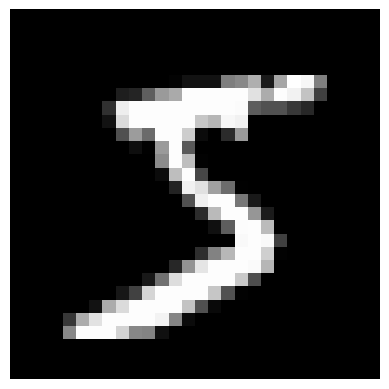

In [6]:
# 顯示第1張圖片圖像
import matplotlib.pyplot as plt

# 第一筆資料
X2 = x_train[0, :, :]
# 繪製點陣圖，cmap='gray':灰階
plt.imshow(X2.reshape(28, 28), cmap="gray")
# 隱藏刻度
plt.axis("off")
plt.show()

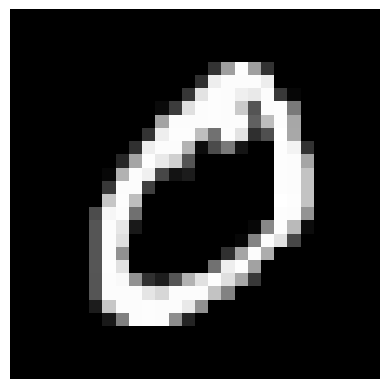

In [7]:
# 顯示第1張圖片圖像
import matplotlib.pyplot as plt

# 第一筆資料
X2 = x_train[1, :, :]

# 繪製點陣圖，cmap='gray':灰階
plt.imshow(X2.reshape(28, 28), cmap="gray")

plt.axis("off")
plt.show()

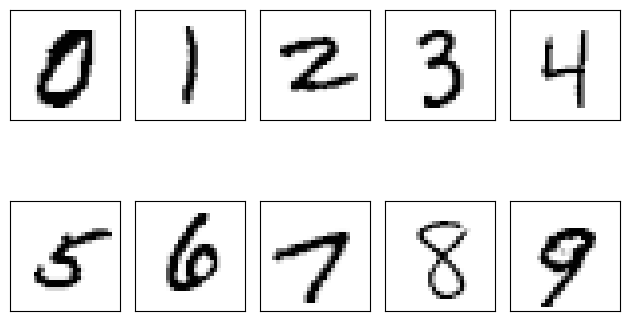

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(
    nrows=2,
    ncols=5,
    sharex=True,
    sharey=True,
)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == i][10].reshape(28, 28)
    ax[i].imshow(img, cmap="Greys")

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()

plt.show()

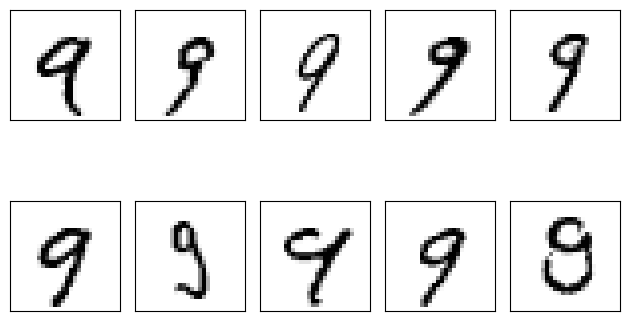

In [9]:
import matplotlib.pyplot as plt

no = 9


fig, ax = plt.subplots(
    nrows=2,
    ncols=5,
    sharex=True,
    sharey=True,
)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == no][i].reshape(28, 28)
    ax[i].imshow(img, cmap="Greys")

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()

plt.show()

## 步驟2：資料清理，此步驟無需進行

## 步驟3：進行特徵工程，將特徵縮放成(0, 1)之間

In [10]:
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255
# 注意，顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## 步驟4：資料分割，此步驟無需進行，載入MNIST資料時，已經切割好了

## 步驟5：建立模型結構

In [11]:
# 建立模型
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation="relu"),
        # tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

/home/chesterxalan/github/Classwork/Classwork-PythonDLApplicationDevelopment/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1726905346.930972   48177 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1726905347.131592   48177 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1726905347.131647   48177 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1726905347.135450   48177 c

In [12]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

## 步驟6：結合訓練資料及模型，進行模型訓練

In [13]:
# 模型訓練
history = model.fit(x_train_norm, y_train, epochs=5, validation_split=0.2)

Epoch 1/5


I0000 00:00:1726905365.792444   48541 service.cc:146] XLA service 0x7f0dd8005cd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726905365.792473   48541 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-09-21 15:56:05.816897: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-21 15:56:05.911983: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  83/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5806 - loss: 1.4307

I0000 00:00:1726905366.877998   48541 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8690 - loss: 0.4655 - val_accuracy: 0.9544 - val_loss: 0.1570
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9609 - loss: 0.1314 - val_accuracy: 0.9669 - val_loss: 0.1132
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9755 - loss: 0.0864 - val_accuracy: 0.9676 - val_loss: 0.1082
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9806 - loss: 0.0640 - val_accuracy: 0.9739 - val_loss: 0.0893
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9861 - loss: 0.0453 - val_accuracy: 0.9721 - val_loss: 0.0917


In [14]:
# 檢查 history 所有鍵值
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

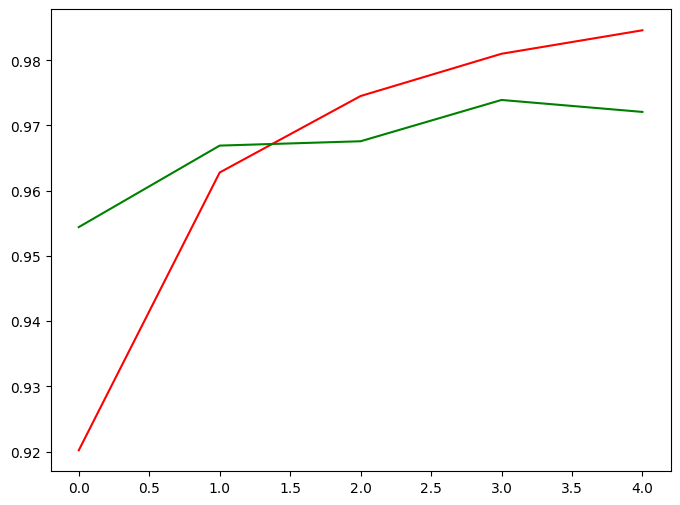

In [15]:
# 對訓練過程的準確率繪圖
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
# plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 6))
plt.plot(history.history["accuracy"], "r")  # , label='訓練準確率'
plt.plot(history.history["val_accuracy"], "g")  # , label='驗證準確率'
# plt.legend()

/tmp/ipykernel_48177/3844776767.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


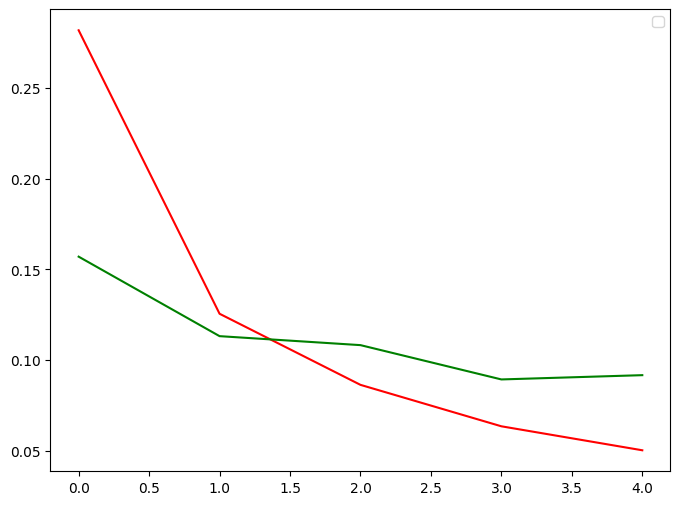

In [16]:
# 對訓練過程的損失繪圖
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history["loss"], "r")  # , label='訓練損失'
plt.plot(history.history["val_loss"], "g")  # , label='驗證損失'
plt.legend()

## 步驟7：評分(Score Model)

In [17]:
# 評分(Score Model)
score = model.evaluate(x_test_norm, y_test, verbose=1)

for i, x in enumerate(score):
    print(f"{model.metrics_names[i]}: {score[i]:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9703 - loss: 0.0975
loss: 0.0846
compile_metrics: 0.9739


In [18]:
# 實際預測 20 筆資料
# predictions = model.predict_classes(x_test_norm)
import numpy as np

predictions = np.argmax(model.predict(x_test_norm), axis=-1)

# 比對
print("actual    :", y_test[0:20])
print("prediction:", predictions[0:20])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
actual    : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
prediction: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [19]:
# 顯示第 9 筆的機率
import numpy as np

predictions = model.predict(x_test_norm[8:9])
print(f"0~9預測機率: {np.around(predictions, 2)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
0~9預測機率: [[0.   0.   0.   0.   0.   0.78 0.21 0.   0.   0.  ]]


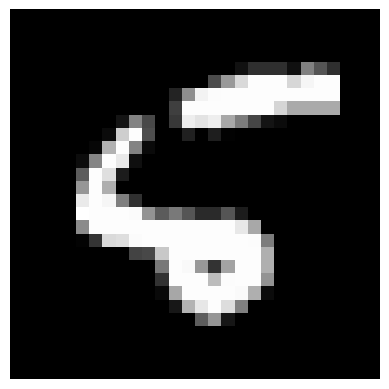

In [20]:
# 顯示第 9 筆圖像
X2 = x_test[8, :, :]
plt.imshow(X2.reshape(28, 28), cmap="gray")
plt.axis("off")
plt.show()

## 步驟8：評估，暫不進行

## 步驟9：模型佈署

In [21]:
# 模型存檔
model.save("model.h5")

# 模型載入
model = tf.keras.models.load_model("model.h5")

## 步驟10：新資料預測

線上繪圖網站：https://canvas.apps.chrome/

In [23]:
# 使用小畫家，繪製 0~9，實際測試看看
from skimage import io
from skimage.transform import resize
import numpy as np

In [34]:
# 將檔案以"上傳"方式存到暫存區
# 讀取影像並轉為單色
uploaded_file = "myDigits/5.png"
image1 = io.imread(uploaded_file, as_gray=True)
print(image1.shape)

# 縮為 (28, 28) 大小的影像
image_resized = resize(image1, (28, 28), anti_aliasing=True)
X1 = image_resized.reshape(1, 28, 28)  # / 255

# 反轉顏色，顏色0為白色，與 RGB 色碼不同，它的 0 為黑色
X1 = np.abs(1 - X1)

# 預測
# predictions = model.predict_classes(X1)
predictions = np.argmax(model.predict(X1), axis=-1)
print(predictions)

(280, 280)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[5]


In [35]:
model.predict(X1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[1.4341079e-03, 2.0575635e-03, 1.1889472e-03, 7.1639031e-02,
        2.4932693e-04, 7.3157644e-01, 7.6046232e-03, 9.6769752e-03,
        6.5133467e-02, 1.0943949e-01]], dtype=float32)

In [36]:
np.sum(model.predict(X1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


0.99999994

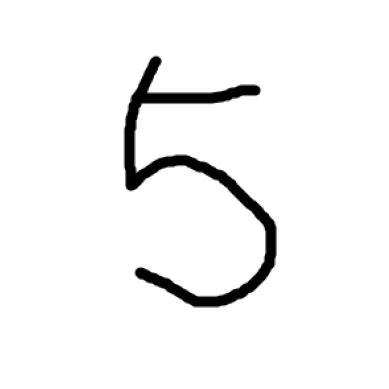

In [37]:
# 繪製點陣圖，cmap='gray':灰階
plt.imshow(image1, cmap="gray")
plt.axis("off")
plt.show()

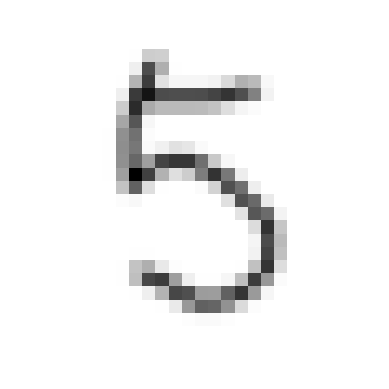

In [38]:
# 繪製點陣圖，cmap='gray':灰階
plt.imshow(image_resized, cmap="gray")
plt.axis("off")
plt.show()

In [39]:
# 讀取影像並轉為單色
for i in range(10):
    uploaded_file = f"./myDigits/{i}.png"
    image1 = io.imread(uploaded_file, as_gray=True)

    # 縮為 (28, 28) 大小的影像
    image_resized = resize(image1, (28, 28), anti_aliasing=True)
    X1 = image_resized.reshape(1, 28, 28)  # / 255

    # 反轉顏色，顏色0為白色，與 RGB 色碼不同，它的 0 為黑色
    X1 = np.abs(1 - X1)

    # 預測
    # predictions = model.predict_classes(X1)
    predictions = np.argmax(model.predict(X1), axis=-1)
    print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[2]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[3]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[4]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[5]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[6]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[7]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[8]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[7]


In [41]:
# 使用小畫家，繪製 0~9，實際測試看看
from skimage import io
from skimage.transform import resize
import numpy as np

# 讀取影像並轉為單色
uploaded_file = "./myDigits/9.png"
image1 = io.imread(uploaded_file, as_gray=True)

# 縮為 (28, 28) 大小的影像
image_resized = resize(image1, (28, 28), anti_aliasing=True)
X1 = image_resized.reshape(1, 28, 28)  # / 255

# 反轉顏色，顏色0為白色，與 RGB 色碼不同，它的 0 為黑色
X1 = np.abs(1 - X1)

# 預測
# predictions = model.predict_classes(X1)
predictions = np.argmax(model.predict(X1), axis=-1)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[7]


## 其他：顯示模型彙總資訊(summary)、繪製圖形顯示模型結構

In [31]:
# 顯示模型的彙總資訊
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,772 (397.55 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [32]:
import pandas as pd

predictions = np.argmax(model.predict(x_test_norm), axis=-1)
pd.crosstab(y_test, predictions, rownames=["實際值"], colnames=["預測值"])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


預測值,0,1,2,3,4,5,6,7,8,9
實際值,,,,,,,,,,
0,967,1,0,1,0,1,3,5,1,1
1,0,1122,3,1,0,0,3,1,5,0
2,6,1,992,3,2,0,2,12,14,0
3,1,0,0,984,0,3,0,7,4,11
4,2,0,2,0,959,0,2,2,0,15
5,1,0,0,10,2,856,7,3,8,5
6,3,3,1,0,4,3,940,0,4,0
7,0,7,7,2,0,0,0,1005,0,7
8,6,0,1,6,6,0,2,9,934,10


In [33]:
import sklearn.metrics

sklearn.metrics.confusion_matrix(
    y_true=y_test, y_pred=np.argmax(model.predict(x_test_norm), axis=-1)
)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ 967,    1,    0,    1,    0,    1,    3,    5,    1,    1],
       [   0, 1122,    3,    1,    0,    0,    3,    1,    5,    0],
       [   6,    1,  992,    3,    2,    0,    2,   12,   14,    0],
       [   1,    0,    0,  984,    0,    3,    0,    7,    4,   11],
       [   2,    0,    2,    0,  959,    0,    2,    2,    0,   15],
       [   1,    0,    0,   10,    2,  856,    7,    3,    8,    5],
       [   3,    3,    1,    0,    4,    3,  940,    0,    4,    0],
       [   0,    7,    7,    2,    0,    0,    0, 1005,    0,    7],
       [   6,    0,    1,    6,    6,    0,    2,    9,  934,   10],
       [   3,    4,    0,    3,    9,    1,    1,    7,    1,  980]])

In [ ]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 

In [ ]:
model.get_weights()

[array([[-0.05494815,  0.04194916,  0.06474949, ...,  0.07565577,
          0.04685519,  0.01226499],
        [ 0.06910904, -0.080061  , -0.02948578, ...,  0.05033503,
         -0.07500081, -0.06829838],
        [ 0.01668917, -0.07098012,  0.08074781, ...,  0.03819536,
         -0.0510389 ,  0.047716  ],
        ...,
        [-0.0098367 ,  0.00317466,  0.08017758, ..., -0.01626285,
         -0.05361294, -0.02110435],
        [ 0.04916354, -0.04880767,  0.02368221, ...,  0.04004765,
          0.00925007,  0.06747148],
        [ 0.02962392,  0.05518805,  0.07321749, ...,  0.00581503,
         -0.01910378,  0.00779558]], dtype=float32),
 array([ 0.05008135, -0.05831063, -0.01089709,  0.0341421 ,  0.08859894,
         0.04503827,  0.15260923,  0.05096751, -0.02464221, -0.04434665,
        -0.00734055, -0.04433202,  0.06244028,  0.07809124, -0.12046077,
         0.09481782,  0.12948926, -0.03340664, -0.03338421,  0.03062645,
         0.02403942, -0.02111651,  0.06562402, -0.02325685, -0.057

In [ ]:
model.get_layer(index=1).name

'dense'

In [ ]:
model.get_layer(index=1).get_weights()

[array([[-0.05494815,  0.04194916,  0.06474949, ...,  0.07565577,
          0.04685519,  0.01226499],
        [ 0.06910904, -0.080061  , -0.02948578, ...,  0.05033503,
         -0.07500081, -0.06829838],
        [ 0.01668917, -0.07098012,  0.08074781, ...,  0.03819536,
         -0.0510389 ,  0.047716  ],
        ...,
        [-0.0098367 ,  0.00317466,  0.08017758, ..., -0.01626285,
         -0.05361294, -0.02110435],
        [ 0.04916354, -0.04880767,  0.02368221, ...,  0.04004765,
          0.00925007,  0.06747148],
        [ 0.02962392,  0.05518805,  0.07321749, ...,  0.00581503,
         -0.01910378,  0.00779558]], dtype=float32),
 array([ 0.05008135, -0.05831063, -0.01089709,  0.0341421 ,  0.08859894,
         0.04503827,  0.15260923,  0.05096751, -0.02464221, -0.04434665,
        -0.00734055, -0.04433202,  0.06244028,  0.07809124, -0.12046077,
         0.09481782,  0.12948926, -0.03340664, -0.03338421,  0.03062645,
         0.02403942, -0.02111651,  0.06562402, -0.02325685, -0.057

In [ ]:
model.count_params()

101770